## COMPARISON RADAR

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar
from mplsoccer import FontManager

In [2]:
df= pd.read_csv(r"C:\Users\jawah\Downloads\fb_data.csv")

In [3]:
URL1 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-Regular.ttf?raw=true')
serif_regular = FontManager(URL1)
URL2 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-ExtraLight.ttf?raw=true')
serif_extra_light = FontManager(URL2)
URL3 = ('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf?raw=true')
rubik_regular = FontManager(URL3)
URL4 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Thin.ttf?raw=true'
robotto_thin = FontManager(URL4)
URL5 = ('https://github.com/google/fonts/blob/3b947ee2732103ef6132b09d234aecd768d2d83c/'
        'apache/roboto/static/Roboto-Thin.ttf?raw=true')
robotto_regular = FontManager(URL5)
URL6 = 'https://github.com/google/fonts/blob/main/apache/robotoslab/RobotoSlab%5Bwght%5D.ttf?raw=true'
robotto_bold = FontManager(URL6)

In [7]:
PLAYER_1 = "Hugo Lloris"
PLAYER_2 = "David de Gea"

df = df[(df['Player']== PLAYER_1) | (df['Player']==PLAYER_2)].reset_index()

In [8]:
params =[ 'index','Player', 'Cmp', 'Att', 'Cmp%', 'Att.1', 'Thr', 'Launch%', 'AvgLen', 'Att.2',
       'Launch%.1', 'AvgLen.1', 'Opp', 'Stp%', '#OPA/90',
       'AvgDist']

df= df[params]
params = list(df.columns)
params = params[2:]

In [9]:
ranges = []
a_values = []
b_values = []

for x in params:
    a = min(df[params][x])
    a = a - (a*.25)
    
    b = max(df[params][x])
    b = b + (b*.25)
    
    ranges.append((a,b))
    
for x in range(len(df['Player'])):
    if df['Player'][x] == 'David de Gea':
        a_values = df.iloc[x].values.tolist()
    if df['Player'][x] == 'Hugo Lloris':
        b_values = df.iloc[x].values.tolist()
        
a_values = a_values[1:]
b_values = b_values[1:]

values = [a_values[1:],b_values[1:]]

In [10]:
title = dict(
    title_name='David de Gea',
    title_color = '#fbff82',
    subtitle_name = 'Man Utd',
    subtitle_color = '#fbff82',
    title_name_2='Hugo Lloris',
    title_color_2 = '#a1f9ff',
    subtitle_name_2 = 'Spurs',
    subtitle_color_2 = '#a1f9ff',
    title_fontsize = 25,
    subtitle_fontsize=15
)

endnote = '@jawaharramis\ndata via FBREF / Statsbomb'


findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.


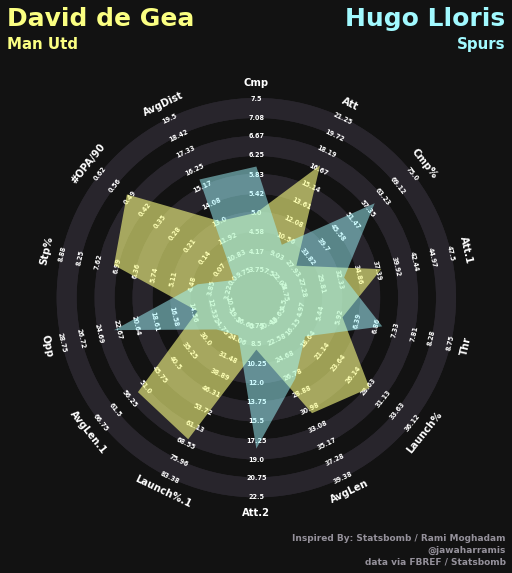

In [11]:
radar = Radar(background_color="#121212", patch_color="#28252C", label_color="#ffffff",
              range_color="#FFFFFF")

fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                         radar_color=['#fbff82', '#a1f9ff'], alphas=[0.6,0.5] ,
                         title=title,endnote=endnote,
                         ring_width=1, center_circle_radius=1,
                         compare=True, )
fig.savefig('./viz/%s vs %s.png'%(title["title_name"], title["title_name_2"]), dpi=600, bbox_inches='tight', pad_inches=0.5)